<a href="https://colab.research.google.com/github/danielsoy/ALOCC-CVPR2018/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.models import Sequential

from numpy import loadtxt
from keras.models import load_model

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [24]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.   # aplica > pandas astype y convierte todo x_train, a float32
x_test = x_test.astype('float32') / 255.     # y divide x 255.(normaliza?)
print(x_train.shape), print(x_test.shape)
print("                                 ")

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

print(x_train.shape), print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
                                 
(60000, 28, 28, 1)
(10000, 28, 28, 1)


(None, None)

In [ ]:
# Create the Encoder and Decoder

# autoencoder = Sequential()

#pass the gray scale input image of size(28,28,1)
inputs = tf.keras.Input(shape=(28, 28, 1), name='input_layer')
# Conv Block 1 -> BatchNorm->leaky Relu
encoded = tf.keras.layers.Conv2D(32, kernel_size=3, strides= 1, padding='same', name='conv_1')(inputs)
encoded = tf.keras.layers.BatchNormalization(name='batchnorm_1')(encoded)
encoded = tf.keras.layers.LeakyReLU(name='leaky_relu_1')(encoded)
# Conv Block 2 -> BatchNorm->leaky Relu
encoded = tf.keras.layers.Conv2D(64, kernel_size=3, strides= 2, padding='same', name='conv_2')(encoded)
encoded = tf.keras.layers.BatchNormalization(name='batchnorm_2')(encoded)
encoded = tf.keras.layers.LeakyReLU(name='leaky_relu_2')(encoded)
# Conv Block 3 -> BatchNorm->leaky Relu
encoded = tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', name='conv_3')(encoded)
encoded = tf.keras.layers.BatchNormalization(name='batchnorm_3')(encoded)
encoded = tf.keras.layers.LeakyReLU(name='leaky_relu_3')(encoded)

In [ ]:
#Decoder
# DeConv Block 1-> BatchNorm->leaky Relu
decoded = tf.keras.layers.Conv2DTranspose(64, 3, strides= 1, padding='same',name='conv_transpose_1')(encoded)
decoded = tf.keras.layers.BatchNormalization(name='batchnorm_4')(decoded)
decoded = tf.keras.layers.LeakyReLU(name='leaky_relu_4')(decoded)
# DeConv Block 2-> BatchNorm->leaky Relu
decoded = tf.keras.layers.Conv2DTranspose(64, 3, strides= 2, padding='same', name='conv_transpose_2')(decoded)
decoded = tf.keras.layers.BatchNormalization(name='batchnorm_5')(decoded)
decoded = tf.keras.layers.LeakyReLU(name='leaky_relu_5')(decoded)
# DeConv Block 3-> BatchNorm->leaky Relu
decoded = tf.keras.layers.Conv2DTranspose(32, 3, 2, padding='same', name='conv_transpose_3')(decoded)
decoded = tf.keras.layers.BatchNormalization(name='batchnorm_6')(decoded)
decoded = tf.keras.layers.LeakyReLU(name='leaky_relu_6')(decoded)
# output
outputs = tf.keras.layers.Conv2DTranspose(1, 3, 1,padding='same', activation='sigmoid', name='conv_transpose_4')(decoded)

In [ ]:
## Define SSIM loss function

def SSIMLoss(y_true, y_pred):
  return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred,1.0))

In [ ]:
# Create the Autoencoder

autoencoder = tf.keras.Model(inputs, outputs)
optimizer = tf.keras.optimizers.Adam(lr = 0.005)
autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the Autoencoder

hist=autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test)
                ) 


Epoch 1/10
469/469 [==============================] - 17s 33ms/step - loss: 0.2487 - val_loss: 0.2461
Epoch 2/10
469/469 [==============================] - 15s 32ms/step - loss: 0.2427 - val_loss: 0.2448
Epoch 3/10
469/469 [==============================] - 15s 32ms/step - loss: 0.2422 - val_loss: 0.2466
Epoch 4/10
469/469 [==============================] - 15s 32ms/step - loss: 0.2418 - val_loss: 0.2505
Epoch 5/10
469/469 [==============================] - 15s 32ms/step - loss: 0.2416 - val_loss: 0.2438
Epoch 6/10
469/469 [==============================] - 15s 32ms/step - loss: 0.2413 - val_loss: 0.2434
Epoch 7/10
469/469 [==============================] - 15s 32ms/step - loss: 0.2411 - val_loss: 0.2471
Epoch 8/10
469/469 [==============================] - 15s 32ms/step - loss: 0.2411 - val_loss: 0.2432
Epoch 9/10
469/469 [==============================] - 16s 33ms/step - loss: 0.2410 - val_loss: 0.2440
Epoch 10/10
469/469 [==============================] - 15s 32ms/step - loss: 0.241

In [ ]:
# salvar todo el modelo, pesos y estructura.
autoencoder.save("model.h5")

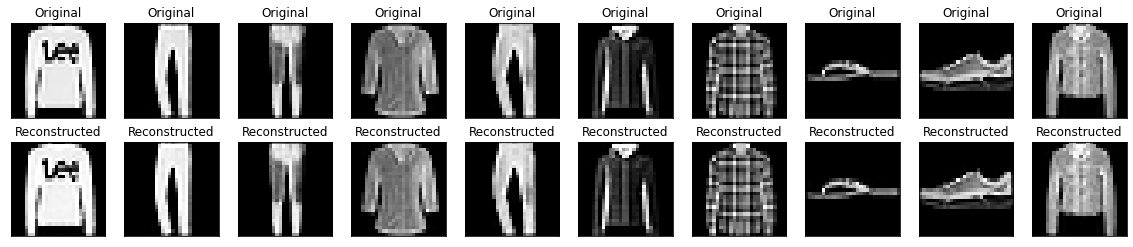

In [ ]:
# Reconstruct the Fashion MNIST images for the test data and visualize

decoded_imgs = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    plt.title("Original")
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.title("Reconstructed")
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

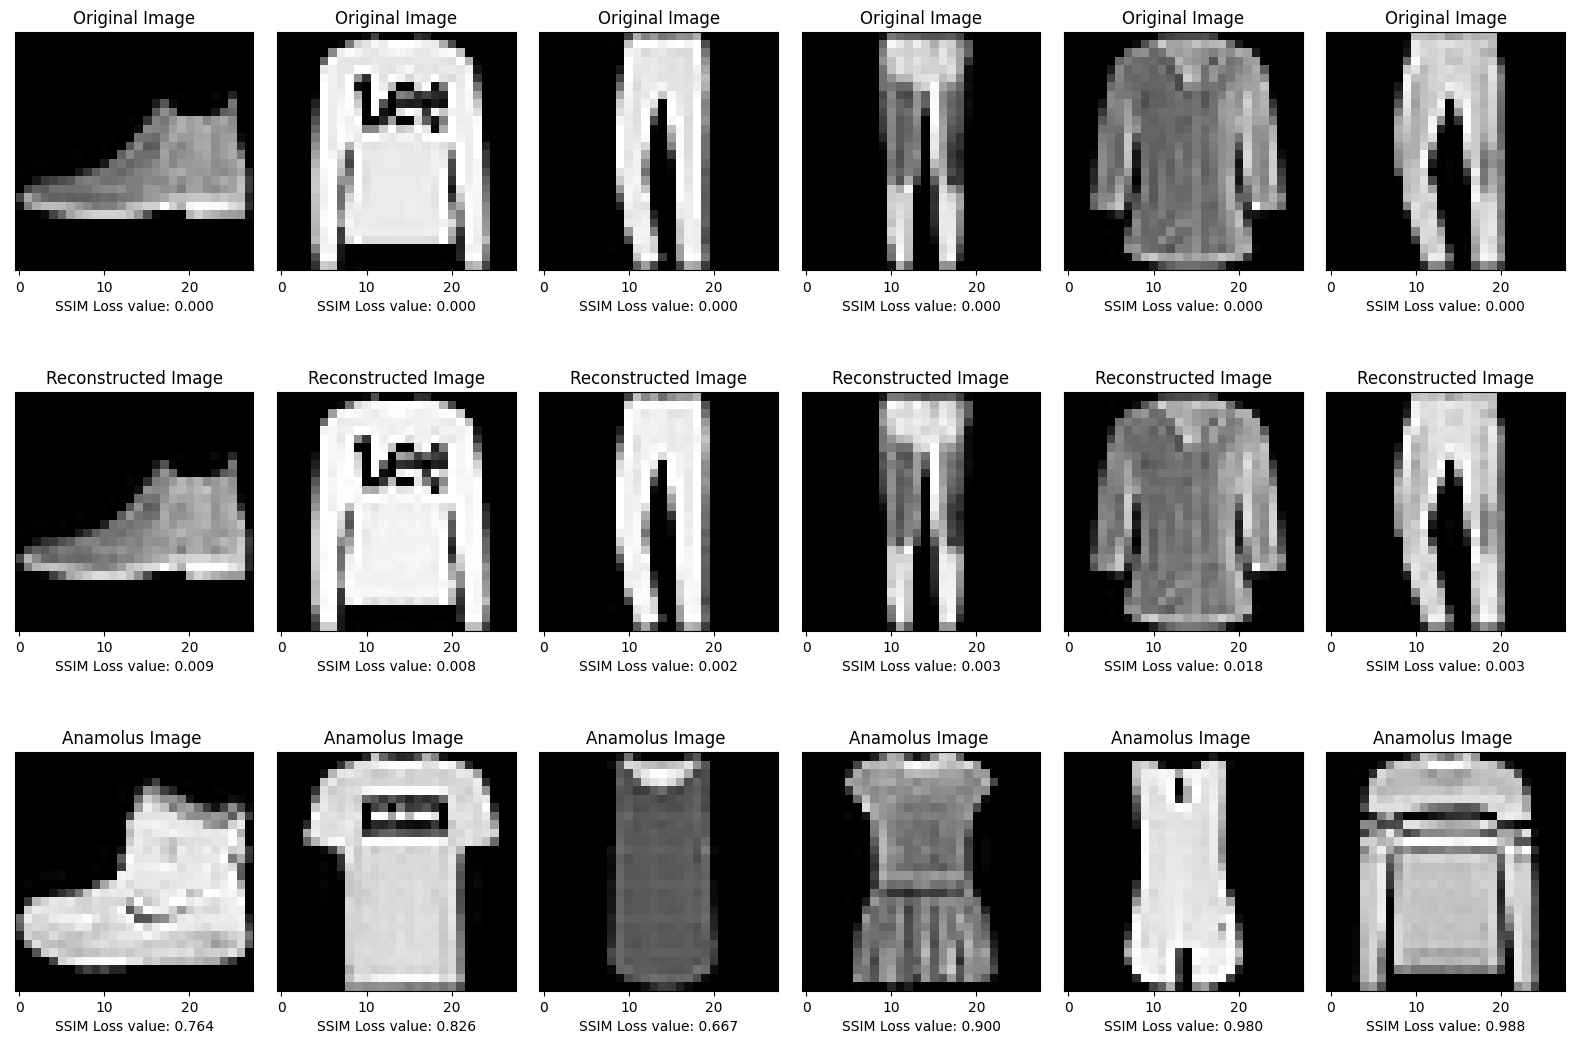

In [ ]:
# Finally, comparing the original data that the autoencoder
# was trained on, the reconstructed image of trained data,
# and prediction on the anomalous image using autoencoder.

n = 6  # how many encoded and decoded images we will display
decoded_imgs= autoencoder.predict(x_test)
decoded_mnistimgs= autoencoder.predict(x_train)  # original (x_mnisttest) , da error x no definida
plt.figure(figsize=(20, 14), dpi=100)
plt.subplots_adjust( wspace=0.1, hspace=0.07)
plt_a=1
for i in range(n):
    # Original training dataset vs Original training
    ax = plt.subplot(3, n, plt_a   )
    plt.imshow(x_test[i].reshape(28,28))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    value_a = SSIMLoss(x_test[i], x_test[i])
    ax.set_title("Original Image")
    label = 'SSIM Loss value: {:.3f}'
    ax.set_xlabel(label.format(value_a) )
    
    # Reconstructed good data  vs Original training data
    ax = plt.subplot(3, n, plt_a + n )
    plt.imshow(decoded_imgs[i].reshape(28,28))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)    
    value_a = SSIMLoss(decoded_imgs[i], x_test[i])
    ax.set_title("Reconstructed Image")
    label = 'SSIM Loss value: {:.3f}'
    ax.set_xlabel(label.format(value_a) )
    
    # Reconstructed anomalous data  vs Original training data
    ax = plt.subplot(3, n, plt_a + 2*n)
    plt.imshow(decoded_mnistimgs[i].reshape(28,28))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    value = SSIMLoss(decoded_mnistimgs[i], decoded_imgs[i])
    label = 'SSIM Loss value: {:.3f}'
    ax.set_title("Anamolus Image " )
    ax.set_xlabel(label.format(value) )
    plt_a+=1
plt.show()

In [ ]:
# load model
model = load_model('model.h5')
# summarize model.
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 28, 28, 32)       128       
 tion)                                                           
                                                                 
 leaky_relu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 14, 14, 64)        18496     
                                                                 
 batchnorm_2 (BatchNormaliza  (None, 14, 14, 64)       256       
 tion)                                                    